## Step 2 Notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from environments.BiddingEnvironment_new import *
from learners.GTS_Learner import *
from learners.GPTS_Learner import *
from data_generators.basic_generator import *

In [8]:
data_gen = BasicDataGenerator('src/basic002.json')

prices = data_gen.get_prices()
bids = data_gen.get_bids()

aggr_cpc = data_gen.get_costs_per_click(mode='aggregate')
aggr_d_clicks = data_gen.get_daily_clicks(mode='aggregate')
aggr_conv_rates = data_gen.get_conversion_rates(mode='aggregate')
aggr_purch = data_gen.get_future_purchases(mode='aggregate')

In [9]:
n_arms = len(bids)

min_bid = min(bids)
max_bid = max(bids)

b = np.linspace(0.0, 1.0, n_arms) #for testinf use linspace for bids
sigma = 10

In [10]:
#P
print(f'prices = {prices}')
print(f'bids = {bids}')
#print(f'{aggr_cpc=}')
#print(f'{aggr_d_clicks=}')
#print(f'{aggr_conv_rates=}')
#print(f'{aggr_purch=}')

prices = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids = [0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]


In [11]:
T = 50
n_experiments = 10

gts_rewards_per_experiment = []
gpts_rewards_per_experiment = []

In [14]:
for e in range(0, n_experiments):
    env = BiddingEnvironment(bids = b, sigma = sigma, n_clicks = aggr_d_clicks, cpc = aggr_cpc, \
                             conversion_rates = aggr_conv_rates, margins = prices, tau = aggr_purch, price_idx = 0)
    gts_learner = GTS_Learner(n_arms = n_arms)
    gpts_learner = GPTS_Learner(n_arms = n_arms, arms = bids)
    for t in range(0, T):
        #pulled_arm = gts_learner.pull_arm()
        #reward = env.round(pulled_arm)
        #gts_learner.update(pulled_arm, reward)
        
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        if(e == 0):
            print('reward = ' + f'{reward}')
            
        gpts_learner.update(pulled_arm, reward)
        
    gts_rewards_per_experiment.append(gts_learner.collected_rewards)
    gpts_rewards_per_experiment.append(gpts_learner.collected_rewards)

reward = 2219.504887875961
reward = 1882.635468152105
reward = 1967.690212986925
reward = 2061.703416665996
reward = 1934.5858823879623
reward = 2070.69846568635
reward = 1724.2996382423541
reward = 1955.3653103010308
reward = 1863.9684808409108
reward = 1173.6161814117831
reward = 2162.440294930076
reward = 1796.347217125778
reward = 2069.292728491899
reward = 1910.214333157096
reward = 2142.243136424584
reward = 2200.6741667082065
reward = 2252.6812959245276
reward = 1901.5768548099734
reward = 1892.0316323896407
reward = 1738.54283524315
reward = 1725.2536108833592
reward = 2030.4007482708441
reward = 1577.0625929966616
reward = 2042.5242507944133
reward = 1692.6870506929558
reward = 1854.7069419273587
reward = 1712.283132882435
reward = 2408.0769311343356
reward = 2080.2909296343078
reward = 2367.7445451667118
reward = 1942.5818899598012
reward = 2183.0763513069764
reward = 1639.7356438370427
reward = 1997.6224350391783
reward = 1727.3116033511842
reward = 1685.5107220106042
reward

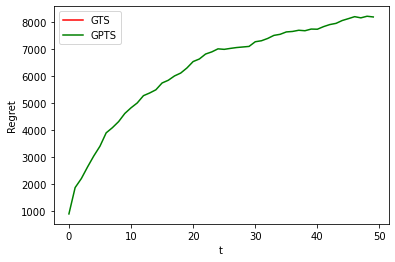

In [15]:
#opt = np.max(env.means)
opt = env.get_opt()

plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(opt - gts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gpts_rewards_per_experiment, axis=0)), 'g')
plt.legend(['GTS', 'GPTS'])
plt.show()